In [365]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [366]:
df=pd.read_csv("bank_marketing.csv")

In [367]:
df = df.drop("Unnamed: 0",axis=1)

In [368]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,services,married,unknown,no,88,yes,no,cellular,11,may,105,1,336,2,failure,no
1,56,technician,married,secondary,no,1938,no,yes,cellular,26,feb,229,1,192,4,success,yes
2,30,services,single,secondary,no,245,no,yes,cellular,8,jul,187,2,-1,0,unknown,no
3,34,management,single,tertiary,no,1396,yes,no,cellular,17,jul,630,1,-1,0,unknown,no
4,29,technician,single,secondary,no,-13,yes,no,cellular,14,may,512,3,-1,0,unknown,no


In [369]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000,5581.000000
mean,41.169683,1514.736786,15.693603,368.175954,2.507436,52.534313,0.849669
std,11.926044,3266.534626,8.461086,344.131053,2.770717,110.754995,2.311684
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,110.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,39.000000,542.000000,15.000000,254.000000,2.000000,-1.000000,0.000000
75%,49.000000,1747.000000,22.000000,485.000000,3.000000,57.000000,1.000000
max,93.000000,81204.000000,31.000000,3284.000000,63.000000,842.000000,41.000000


In [370]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.128465,0.009250,-0.008453,-0.018844,-0.002383,0.022026
balance,0.128465,1.000000,0.005989,0.022242,-0.015866,0.030656,0.044003
day,0.009250,0.005989,1.000000,-0.013211,0.133264,-0.073403,-0.048452
duration,-0.008453,0.022242,-0.013211,1.000000,-0.048190,-0.034635,-0.031562
campaign,-0.018844,-0.015866,0.133264,-0.048190,1.000000,-0.098066,-0.041082
pdays,-0.002383,0.030656,-0.073403,-0.034635,-0.098066,1.000000,0.492715
previous,0.022026,0.044003,-0.048452,-0.031562,-0.041082,0.492715,1.000000


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5581 entries, 0 to 5580
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        5581 non-null   int64 
 1   job        5581 non-null   object
 2   marital    5581 non-null   object
 3   education  5581 non-null   object
 4   default    5581 non-null   object
 5   balance    5581 non-null   int64 
 6   housing    5581 non-null   object
 7   loan       5581 non-null   object
 8   contact    5581 non-null   object
 9   day        5581 non-null   int64 
 10  month      5581 non-null   object
 11  duration   5581 non-null   int64 
 12  campaign   5581 non-null   int64 
 13  pdays      5581 non-null   int64 
 14  previous   5581 non-null   int64 
 15  poutcome   5581 non-null   object
 16  deposit    5581 non-null   object
dtypes: int64(7), object(10)
memory usage: 741.4+ KB


In [372]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

C:\Users\pavan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\pavan\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


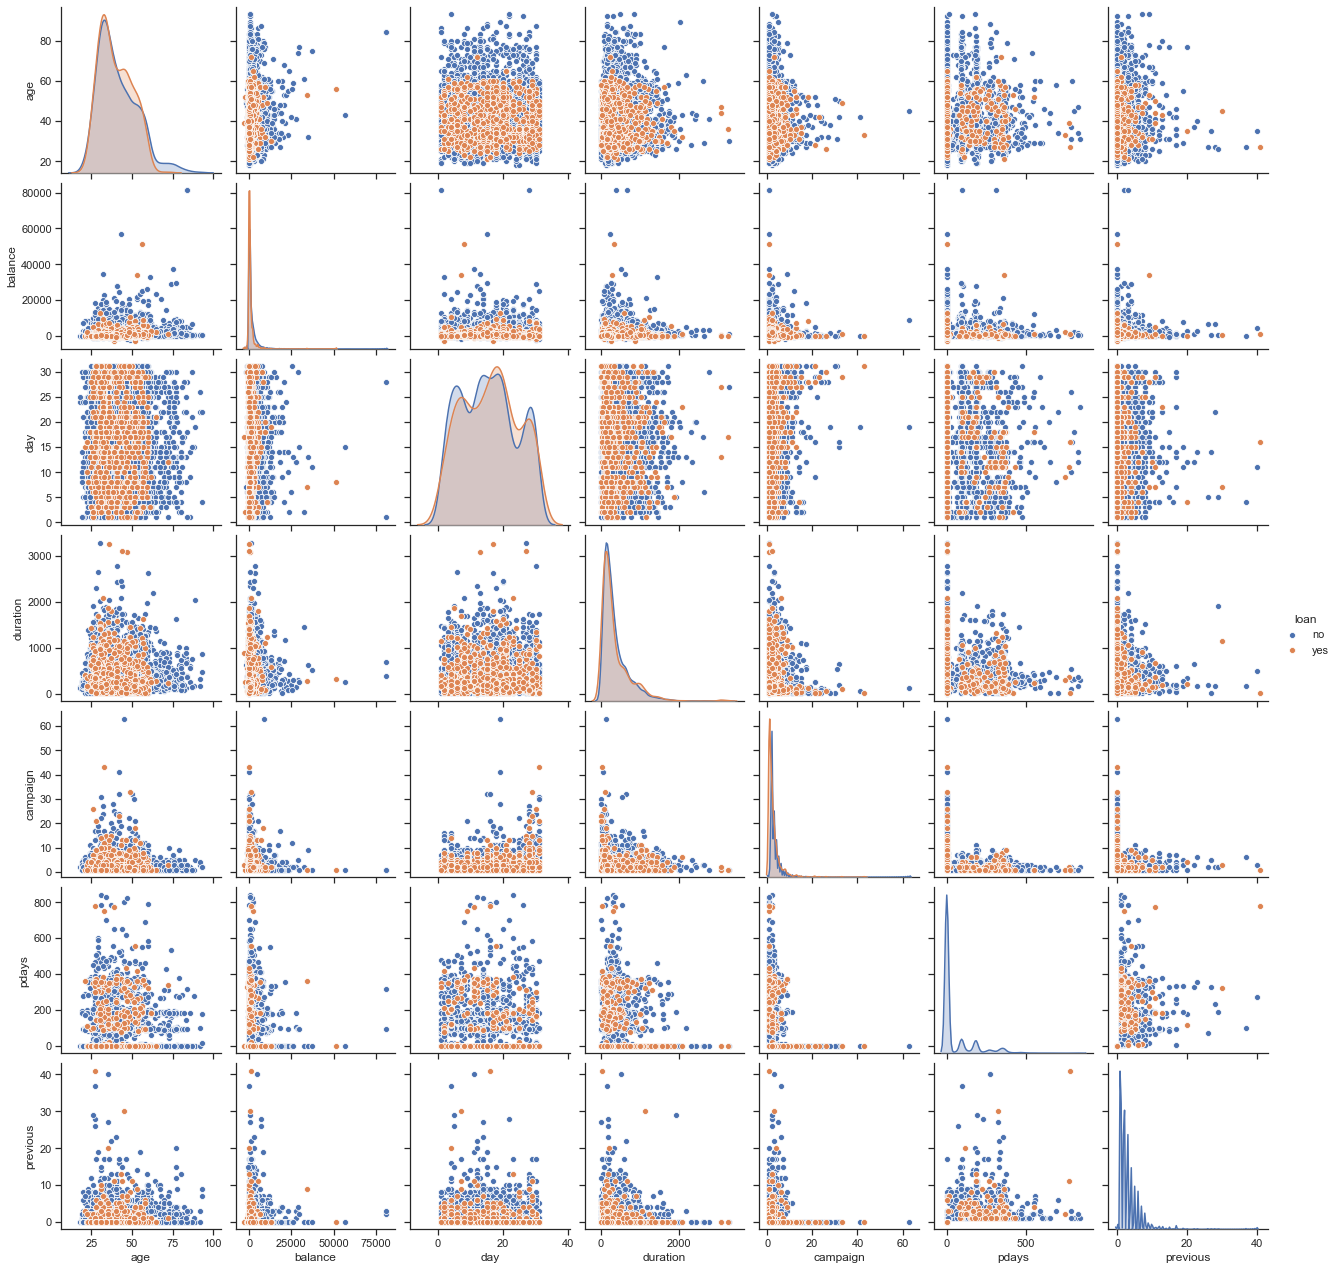

In [373]:
sns.pairplot(df,hue="loan")

In [374]:
df[df["deposit"] == 'yes']["age"].mean()   

41.42677345537757

In [375]:
df[df["deposit"] == 'no']['campaign'].unique().max()

63

In [376]:
diff = (df[df["deposit"] == 'yes']["balance"].max() - df[df["deposit"] == 'no']["balance"].max())

In [377]:
diff

24373

In [378]:
df[df["job"] == 'management'].count()

age          1318
job          1318
marital      1318
education    1318
default      1318
balance      1318
housing      1318
loan         1318
contact      1318
day          1318
month        1318
duration     1318
campaign     1318
pdays        1318
previous     1318
poutcome     1318
deposit      1318
dtype: int64

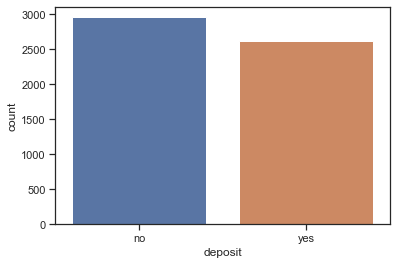

In [379]:
sns.countplot(df["deposit"])

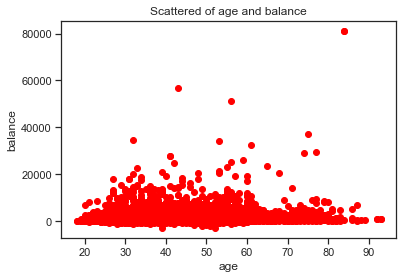

In [380]:
plt.scatter(df['age'],df['balance'],c='red')
plt.title('Scattered of age and balance')
plt.xlabel('age')
plt.ylabel('balance')
plt.show()

In [381]:
df.loc[(df['job']=='unemployed')&(df['deposit']=='yes')].count()

age          92
job          92
marital      92
education    92
default      92
balance      92
housing      92
loan         92
contact      92
day          92
month        92
duration     92
campaign     92
pdays        92
previous     92
poutcome     92
deposit      92
dtype: int64

In [382]:
new_data=pd.get_dummies(df,drop_first=True)
new_data

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit_yes
0,41,88,11,105,1,336,2,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,56,1938,26,229,1,192,4,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,30,245,8,187,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,34,1396,17,630,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,29,-13,14,512,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5576,48,2235,15,755,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5577,40,-388,4,195,3,340,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5578,27,91,4,157,6,95,37,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5579,46,1568,2,310,1,55,6,1,0,0,...,1,0,0,0,0,0,1,0,0,1


In [383]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [384]:
columns_list=list(new_data.columns)
print(columns_list)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_secondary', 'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'deposit_yes']


In [385]:
new_data.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown',
       'deposit_yes'],
      dtype='object')

In [386]:
new_data['deposit_yes'].value_counts()

0    2959
1    2622
Name: deposit_yes, dtype: int64

In [387]:
df['deposit'].value_counts()

no     2959
yes    2622
Name: deposit, dtype: int64

In [388]:
features=list(set(columns_list)-set(['deposit']))
print(features)

['job_self-employed', 'job_housemaid', 'month_mar', 'job_unknown', 'month_nov', 'job_student', 'contact_unknown', 'balance', 'housing_yes', 'education_unknown', 'month_feb', 'education_tertiary', 'poutcome_success', 'age', 'job_entrepreneur', 'month_may', 'poutcome_other', 'job_blue-collar', 'loan_yes', 'education_secondary', 'job_retired', 'job_management', 'month_sep', 'marital_married', 'contact_telephone', 'pdays', 'month_oct', 'month_dec', 'job_unemployed', 'month_aug', 'poutcome_unknown', 'deposit_yes', 'job_technician', 'previous', 'default_yes', 'month_jan', 'month_jul', 'month_jun', 'day', 'campaign', 'job_services', 'marital_single', 'duration']


In [389]:
x=new_data[features].values
x

array([[  0,   0,   0, ...,   1,   0, 105],
       [  0,   0,   0, ...,   0,   0, 229],
       [  0,   0,   0, ...,   1,   1, 187],
       ...,
       [  0,   0,   0, ...,   0,   1, 157],
       [  0,   0,   0, ...,   0,   0, 310],
       [  0,   0,   0, ...,   1,   0, 503]], dtype=int64)

In [390]:
y=new_data['deposit_yes'].values
y

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

# Logistic Regression

In [391]:
from sklearn.linear_model import LogisticRegression 

In [392]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30, random_state=0)

In [393]:
logistic = LogisticRegression()

In [394]:
logistic.fit(train_x,train_y)

C:\Users\pavan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [395]:
prediction = logistic.predict(test_x)
print(prediction)

[1 0 0 ... 1 1 1]


In [396]:
#accuracy_score=accuracy_score(test_y, prediction)
log_acc=accuracy_score(test_y, prediction)

In [397]:
log_acc

0.9826865671641791

# Random Forest

In [419]:
from sklearn.ensemble import RandomForestClassifier

In [420]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [421]:
#model=RandomForestClassifier(n_estimators=7)

In [422]:
rfc = RandomForestClassifier(n_estimators = 7)

In [423]:
from sklearn import metrics

In [424]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=7)

In [425]:
rfcpred = rfc.predict(test_x)

In [426]:
confusion_matrix(test_y,rfcpred)

array([[899,   3],
       [  1, 772]], dtype=int64)

In [427]:
rand_acc=metrics.accuracy_score(test_y, rfcpred)

In [428]:
rand_acc

0.9976119402985074

# K-Nearest Neighbors

In [429]:
from sklearn.neighbors import KNeighborsClassifier

In [430]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [431]:
KNN_classifier = KNeighborsClassifier(n_neighbors = 7)

In [432]:
KNN_classifier.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [433]:
prediction = KNN_classifier.predict(test_x)

In [434]:
#accuracy_score=accuracy_score(test_y,prediction)

knn_acc=metrics.accuracy_score(test_y, prediction)
#print(accuracy_score)

In [435]:
knn_acc

0.7546268656716418

# Dataframe of Classifier and Accuracy

In [436]:
d = {'Classifiers': ['Logistic Regression','Random Forest','KNN Model'], 
    'Accuracy': [log_acc,rand_acc,knn_acc ]}

In [437]:
result_df = pd.DataFrame(data=d)

In [438]:
result_df

,Classifiers,Accuracy
0,Logistic Regression,0.982687
1,Random Forest,0.997612
2,KNN Model,0.754627
